# Load

In [22]:
devtools::load_all("~/public/SiyuanLuo/projects/clustering_metrics/ClusteringMetrics")

ℹ Loading ClusteringMetrics


In [23]:
library(ggplot2)
library(tidyr)
library(cowplot)
library(dplyr)
library(grid)

# Data
Simulate Visium-like hexagonal grid data

In [24]:
# Define the grid dimensions
n_rows <- 16
n_cols <- 15  

simulate_array <- function(n_rows=10, n_cols=10){
  # Create coordinates for the hexagonal grid
  array <- data.frame(row = integer(), col = integer())
  
  for (r in 0:(n_rows - 1)) {
    if (r %% 2 == 0) {
      # Even row: column indices are even (0, 2, 4, ...)
      cols <- seq(0, n_cols*2 - 1, by = 2)
    } else {
      # Odd row: column indices are odd (1, 3, 5, ...)
      cols <- seq(1, n_cols*2 - 1, by = 2)
    }
    # Add to coordinates data frame
    array <- rbind(array, data.frame(row = r, col = cols))
  }
  return(array)
}

simulate_hexagonal_grid <- function(n_rows=10, n_cols=10){
  hex_radius <- 1
  hex_height <- 1.5 * hex_radius
  
  # Initialize vectors to store the x and y coordinates
  x_coords <- numeric(n_rows * n_cols)
  y_coords <- numeric(n_rows * n_cols)
  
  index <- 1
  
  for (row in 1:n_rows) {
    for (col in 1:n_cols) {
      # Calculate x and y for the center of the hexagon
      x <- col * sqrt(3) * hex_radius
      y <- row * hex_height
      
      # Shift alternate rows
      if (row %% 2 == 0) {
        x <- x + sqrt(3)/2
      }
      
      # Store the coordinates
      x_coords[index] <- x
      y_coords[index] <- y
      index <- index + 1
    }
  }
  
  # Return the coordinates as a data frame
  coords <- data.frame(x = x_coords, y = y_coords)
  coords <- cbind(coords, simulate_array(n_rows, n_cols))
  return(coords)
}


data <- simulate_hexagonal_grid(n_rows, n_cols)
data$label <- NA
for (i in 1:dim(data)[1]) {
  if(data[i, "col"] > data[i, "row"] + 6){
    data[i, "label"] <- 1
  }else{
  data[i, "label"] <- 2
  }
}
data$label <- factor(data$label)

Simulate some errors

In [25]:
s <- 3
st <- 1

data$p1 <- data$label
data[data$row == 4 & (data$col %in% c(12,14,16,18,20)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15,17,19)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14,16,18,20)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 7 & (data$col %in% c(15,17,19)), "p1"] <- factor(2, levels=c(1,2))

data$p2 <- data$label
for (i in unique(data$row)) {
  data[data$row==i & data$col==i+8, "p2"] <- factor(2, levels=c(1,2))
} 

p0 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=label)) + 
  labs(x="",y="", title="C") 


p1 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p1)) + 
  labs(x="",y="", title="P1") 


p2 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p2)) + 
  labs(x="",y="", title="P2") 

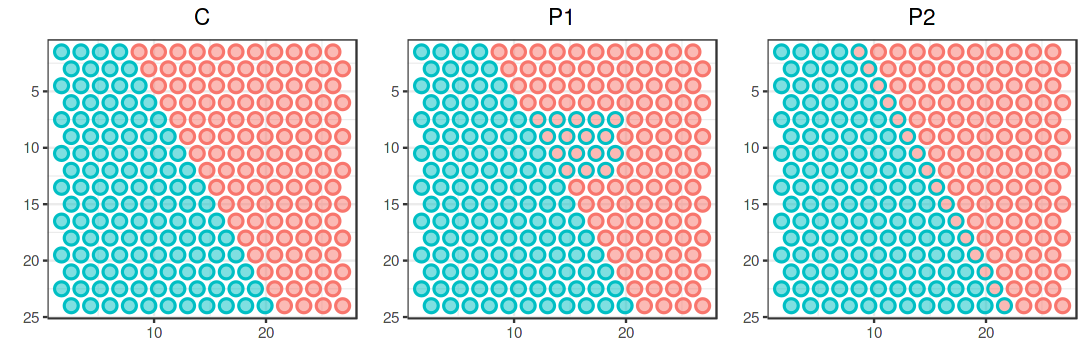

In [26]:
options(repr.plot.width=9, repr.plot.height=3)
# pdf("Fig1.pdf", width=10, height=3)
ps1 <- plot_grid(p0 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)),
                 p1 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                p2 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                # p3 + theme(legend.position = "none"), 
                # p4 + theme(legend.position = "none"), 
                # labels = c("C", "P1", "P2"), 
                ncol = 3)
plot(ps1)
# dev.off()


In [27]:
data$p3 <- data$label
data[data$row == 3 & (data$col %in% c(11,13)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 4 & (data$col %in% c(12,14,16)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15,17)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14,16,18)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 7 & (data$col %in% c(15,17,19)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 8 & (data$col %in% c(16,18)), "p3"] <- factor(2, levels=c(1,2))

data$p4 <- data$label
data[data$row == 3 & (data$col %in% c(21,23)), "p4"] <- factor(2, levels=c(1,2))

data[data$row == 4 & (data$col %in% c(12,14)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14)), "p4"] <- factor(2, levels=c(1,2))

data[data$row == 5 & (data$col %in% c(21,23)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(22)), "p4"] <- factor(2, levels=c(1,2))

data[data$row == 9 & (data$col %in% c(25)), "p4"] <- factor(2, levels=c(1,2))

data[data$row == 12 & (data$col %in% c(26)), "p4"] <- factor(2, levels=c(1,2))

data[data$row == 10 & (data$col %in% c(18,20)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 11 & (data$col %in% c(19,21)), "p4"] <- factor(2, levels=c(1,2))

p3 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p3)) + 
  labs(x="",y="", title="P3") 
p4 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p4)) + 
  labs(x="",y="", title="P4") 

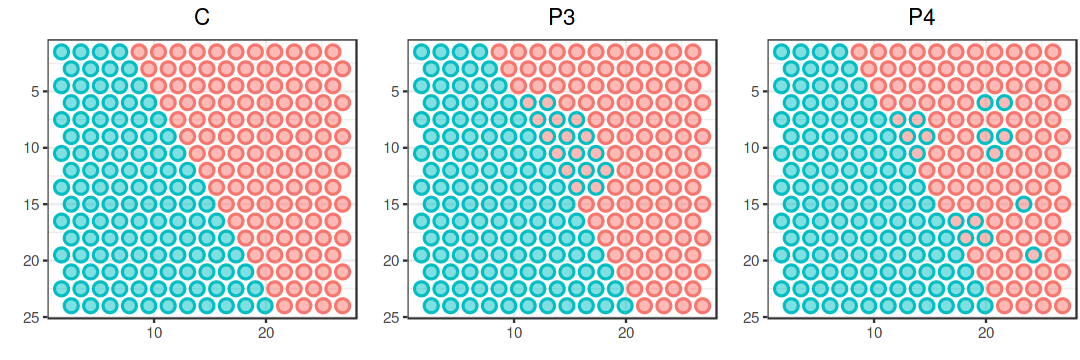

In [28]:
options(repr.plot.width=9, repr.plot.height=3)
# pdf("Fig1.pdf", width=10, height=3)
ps2 <- plot_grid(p0 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)),
                 p3 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                 p4 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                # labels = c("C", "P3", "P4"), 
                ncol = 3)
plot(ps2)
# dev.off() 


# P1, P2

## Global metrics

In [29]:
head(data)

,x,y,row,col,label,p1,p2,p3,p4
,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1.732051,1.5,0,0,2,2,2,2,2
2,3.464102,1.5,0,2,2,2,2,2,2
3,5.196152,1.5,0,4,2,2,2,2,2
4,6.928203,1.5,0,6,2,2,2,2,2
5,8.660254,1.5,0,8,1,1,2,1,1
6,10.392305,1.5,0,10,1,1,1,1,1


In [30]:
k <- 6
label <- data$label
location <- data[, c('x','y')]
internal <-as.data.frame(lapply(setNames(c("p1","p2","p3","p4"), c("P1","P2","P3","P4")), function(x){getSpatialGlobalInternalMetrics(data[[x]], location, k=k, metrics=c("PAS", "ELSA", "CHAOS","MPC", "PC", "PE"))}))
externalSpatial <- as.data.frame(lapply(setNames(c("p1","p2","p3","p4"), c("P1","P2","P3","P4")), function(x){getSpatialGlobalExternalMetrics(data$label, data[[x]], location, k=k, 
                                                                                                                                                metrics=c("SpatialRI","SpatialARI","SpatialWH","SpatialAWH", 
                                                                                                                                                "SpatialWC","SpatialAWC","SpatialAccuracy","setMatchingAccuracy"))}))
externalNormal <- as.data.frame(lapply(setNames(c("p1","p2","p3","p4"), c("P1","P2","P3","P4")), function(x){getPartitionMetrics(data$label, data[[x]], metrics=c("RI","WC","WH","ARI","AWC","AWH"))}))

Standard error of the mean NDC across permutations:0.000967

Standard error of the mean NDC across permutations:0.001

Standard error of the mean NDC across permutations:0.000894

Standard error of the mean NDC across permutations:0.000755



In [31]:
internal

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
PAS,0.02500000,0.004166667,0.02916667,0.0625000
ELSA.Ea,0.09483870,0.071982720,0.08266814,0.1378365
ELSA.Ec,0.25441365,0.197254062,0.22408725,0.3407768
ELSA,0.07990288,0.061669496,0.06986983,0.1056196
CHAOS,0.13066575,0.130665751,0.13066575,0.1339368
MPC,0.85058503,0.890612245,0.86772789,0.7744983
PC,0.92529252,0.945306122,0.93386395,0.8872491
PE,0.11019994,0.080844892,0.09712150,0.1694497


In [32]:
externalSpatial

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
SpatialRI,0.8847440,0.8881032,0.8843614,0.8884997
SpatialARI,0.7586460,0.7685529,0.7590278,0.7635489
SpatialWH,0.8044816,0.8533981,0.8162416,0.8027229
SpatialAWH,0.6063748,0.7048537,0.6303916,0.6036880
SpatialWC,0.8249695,0.8701271,0.8344695,0.8447284
SpatialAWC,0.6378464,0.7334100,0.6591530,0.6707122
SpatialAccuracy,0.9388889,0.9567460,0.9416667,0.9402778
setMatchingAccuracy,0.9333333,0.9333333,0.9333333,0.9333333


In [33]:
externalNormal

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
RI,0.8750349,0.8750349,0.8750349,0.8750349
WC,0.8834734,0.8834734,0.8834734,0.8834734
WH,0.8679141,0.8679141,0.8679141,0.8679141
ARI,0.7500840,0.7500840,0.7500840,0.7500840
AWC,0.7637173,0.7637173,0.7637173,0.7637173
AWH,0.7369290,0.7369290,0.7369290,0.7369290


In [34]:
internal$metric <- factor(rownames(internal))

In [35]:
internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value")

metric,prediction,value
<fct>,<chr>,<dbl>
PAS,P1,0.025000000
PAS,P2,0.004166667
PAS,P3,0.029166667
PAS,P4,0.062500000
ELSA.Ea,P1,0.094838697
ELSA.Ea,P2,0.071982720
ELSA.Ea,P3,0.082668135
ELSA.Ea,P4,0.137836476
ELSA.Ec,P1,0.254413652


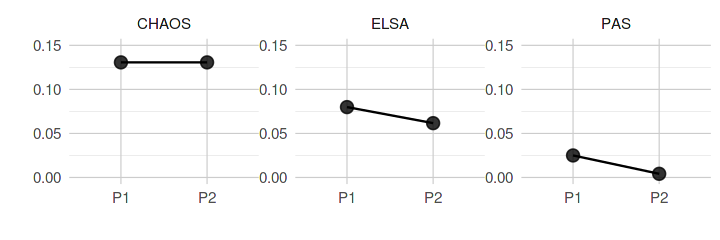

In [36]:
options(repr.plot.width=6, repr.plot.height=2)
pi <- internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(metric %in% c("PAS", "ELSA", "CHAOS")) %>%
filter(prediction %in% c('P1','P2')) %>%
ggplot(aes(x=prediction, y=value)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric, scales = "free", nrow=1) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="", x="") +
ylim(0, 0.15)
pi

In [37]:
external <- rbind(externalSpatial, externalNormal)
external$metric <- rownames(external)
external$metric_class <- sub("Spatial", "", external$metric)
external$metric_type <- ifelse(grepl("Spatial",external$metric) , "Spatial", "NonSpatial")
external["SpatialAccuracy", "metric_class"] <- "Set Matching\nAccuracy"
external["setMatchingAccuracy", "metric_class"] <- "Set Matching\nAccuracy"

In [38]:
unique(external$metric_class)

[1] "RI"                     "ARI"                    "WH"                    
[4] "AWH"                    "WC"                     "AWC"                   
[7] "Set Matching\nAccuracy"

In [39]:
external$metric_class <- factor(external$metric_class, levels=c('RI','ARI','WH','AWH','WC','AWC','Set Matching\nAccuracy'))
external

,P1,P2,P3,P4,metric,metric_class,metric_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
SpatialRI,0.8847440,0.8881032,0.8843614,0.8884997,SpatialRI,RI,Spatial
SpatialARI,0.7586460,0.7685529,0.7590278,0.7635489,SpatialARI,ARI,Spatial
SpatialWH,0.8044816,0.8533981,0.8162416,0.8027229,SpatialWH,WH,Spatial
SpatialAWH,0.6063748,0.7048537,0.6303916,0.6036880,SpatialAWH,AWH,Spatial
SpatialWC,0.8249695,0.8701271,0.8344695,0.8447284,SpatialWC,WC,Spatial
SpatialAWC,0.6378464,0.7334100,0.6591530,0.6707122,SpatialAWC,AWC,Spatial
SpatialAccuracy,0.9388889,0.9567460,0.9416667,0.9402778,SpatialAccuracy,Set Matching Accuracy,Spatial
setMatchingAccuracy,0.9333333,0.9333333,0.9333333,0.9333333,setMatchingAccuracy,Set Matching Accuracy,NonSpatial
RI,0.8750349,0.8750349,0.8750349,0.8750349,RI,RI,NonSpatial


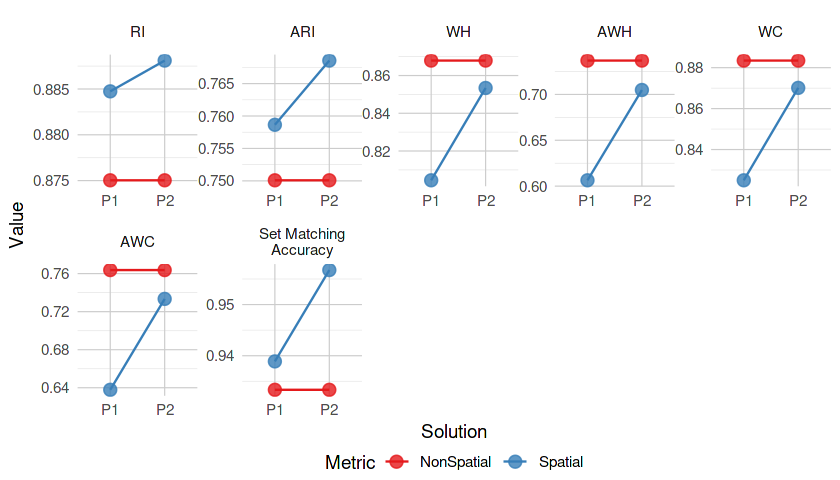

In [40]:
options(repr.plot.width=7, repr.plot.height=4)
px <- external %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(prediction %in% c("P1","P2")) %>%
ggplot(aes(x=prediction, y=value, color=metric_type)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric_class, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Metric")  +
scale_color_brewer(palette = "Set1")
# ylim(0.7, 0.96)
px

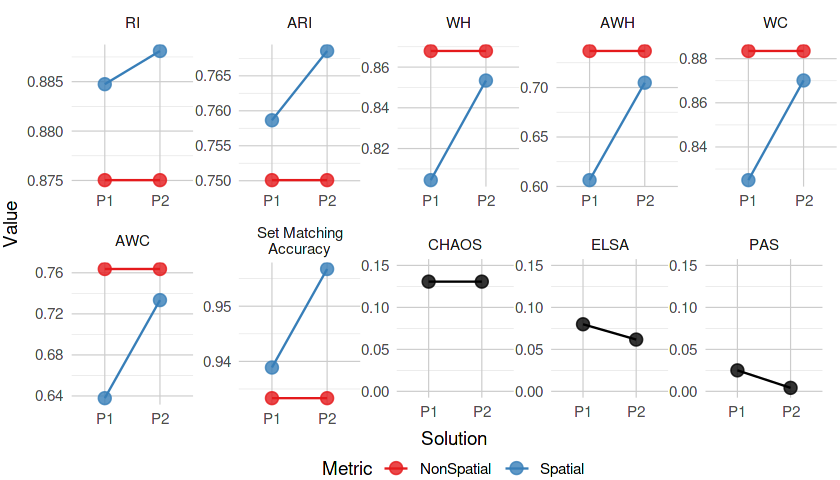

In [41]:
options(repr.plot.width=7, repr.plot.height=4)
p12 <- ggdraw() +
  draw_plot(px + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(pi, x = 0.39, y = 0.059, width = 0.6, height = 0.48)  # Inset plot

p12

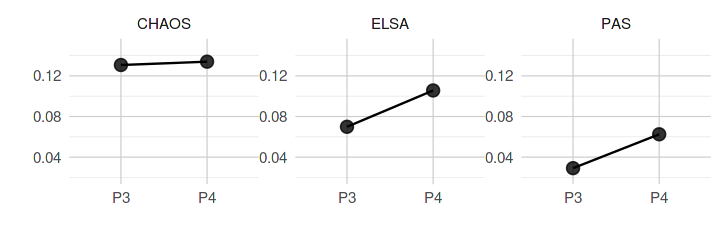

In [42]:
options(repr.plot.width=6, repr.plot.height=2)
pi <- internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(metric %in% c("PAS", "ELSA", "CHAOS")) %>%
filter(prediction %in% c('P3','P4')) %>%
ggplot(aes(x=prediction, y=value)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric, scales = "free", nrow=1) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="", x="") +
ylim(0.02, 0.15)
pi

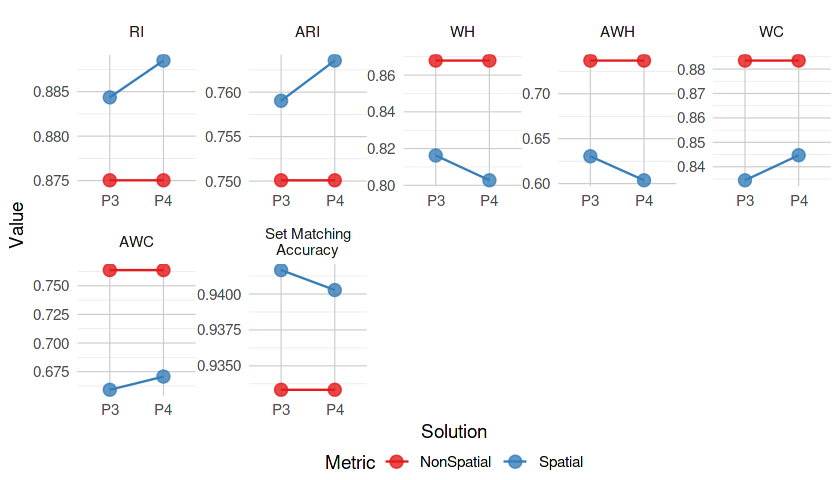

In [43]:
options(repr.plot.width=7, repr.plot.height=4)
px <- external %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(prediction %in% c("P3","P4")) %>%
ggplot(aes(x=prediction, y=value, color=metric_type)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric_class, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Metric") +
scale_color_brewer(palette = "Set1")
# ylim(0.7, 0.96)
px

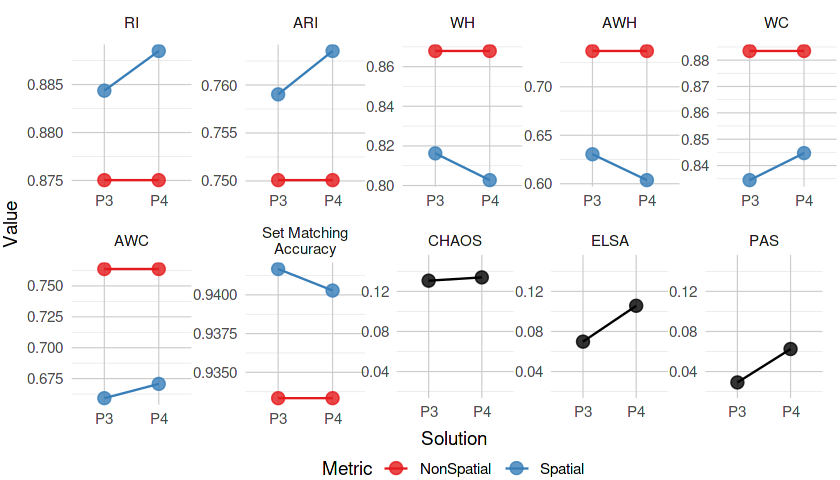

In [44]:
options(repr.plot.width=7, repr.plot.height=4)
p34 <- ggdraw() +
  draw_plot(px + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(pi, x = 0.39, y = 0.058, width = 0.6, height = 0.49)  # Inset plot

p34

In [45]:
pdf("spatial_toy.pdf", width=7.5, height=12.5)
plot_grid(ps1, 
          p12, 
          ps2,
          p34,
labels = c("a", "b", "c", "d"), 
label_size = 18,
ncol = 1, rel_heights = c(3,4,3,4))
dev.off()


png 
  2